In [0]:
#Prueba sin cluster
spark.range(5).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



In [0]:
#Importar librerias
from pyspark.sql.functions import col, sum, month, year
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
# Cargar tabla
df = spark.sql("SELECT * FROM default.afluencia_metro")
df.show(5)


+----------+-----+----+-------+--------+---------+---------+
|     fecha|  mes|anio|  linea|estacion|tipo_pago|afluencia|
+----------+-----+----+-------+--------+---------+---------+
|2021-01-01|Enero|2021|Linea 1|Balbuena|   Boleto|     1848|
|2021-01-01|Enero|2021|Linea 1|Balbuena|  Prepago|      790|
|2021-01-01|Enero|2021|Linea 1|Balbuena|Gratuidad|      325|
|2021-01-01|Enero|2021|Linea 1|Balderas|   Boleto|     1103|
|2021-01-01|Enero|2021|Linea 1|Balderas|  Prepago|      922|
+----------+-----+----+-------+--------+---------+---------+
only showing top 5 rows


In [0]:
# ¿Qué estaciones tienen más afluencia total?
estaciones_top = df.groupBy("estacion") \
                   .agg(sum("afluencia").alias("total_afluencia")) \
                   .orderBy(col("total_afluencia").desc())

estaciones_top.show(10)


+--------------------+---------------+
|            estacion|total_afluencia|
+--------------------+---------------+
|           Pantitlan|      200749838|
|Constitucion de 1917|      127996492|
|       Indios Verdes|      122995337|
|            Tacubaya|       98817240|
|      Cuatro Caminos|       94991610|
|            Taxque�a|       77746551|
|          Buenavista|       68380935|
|         Universidad|       66640686|
|         Pino Suarez|       63173404|
|       Ciudad Azteca|       57493379|
+--------------------+---------------+
only showing top 10 rows


In [0]:
# ¿Qué tipo de pago es más común?
tipos_pago = df.groupBy("tipo_pago") \
               .agg(sum("afluencia").alias("total_afluencia")) \
               .orderBy(col("total_afluencia").desc())

tipos_pago.show()


+---------+---------------+
|tipo_pago|total_afluencia|
+---------+---------------+
|  Prepago|     3055225264|
|   Boleto|      770301660|
|Gratuidad|      581730500|
+---------+---------------+



In [0]:
#¿Qué líneas del metro tienen mayor afluencia?
lineas_mas_usadas = df.groupBy("linea") \
                      .agg(sum("afluencia").alias("total_afluencia")) \
                      .orderBy(col("total_afluencia").desc())

lineas_mas_usadas.show()


+--------+---------------+
|   linea|total_afluencia|
+--------+---------------+
| Linea 2|      754898822|
| Linea 3|      659785638|
| Linea B|      496690484|
| Linea 8|      479821499|
| Linea 1|      386865291|
| Linea 9|      349675849|
| Linea 7|      307091896|
| Linea A|      293603450|
| Linea 5|      233633106|
|Linea 12|      201018779|
| Linea 6|      147616946|
| Linea 4|       96555664|
+--------+---------------+



In [0]:
#¿Que meses tienen mas viajes? 
viajes_por_mes = df.groupBy("mes", "anio") \
                   .agg(sum("afluencia").alias("total_afluencia")) \
                   .orderBy("anio", "mes")

viajes_por_mes.show()


+----------+----+---------------+
|       mes|anio|total_afluencia|
+----------+----+---------------+
|     Abril|2021|       62577359|
|    Agosto|2021|       67964499|
| Diciembre|2021|       84154004|
|     Enero|2021|       41033642|
|   Febrero|2021|       50436321|
|     Julio|2021|       69822069|
|     Junio|2021|       63410819|
|     Marzo|2021|       65449779|
|      Mayo|2021|       62689975|
| Noviembre|2021|       78483883|
|   Octubre|2021|       78122952|
|Septiembre|2021|       70154247|
|     Abril|2022|       82897274|
|    Agosto|2022|       90184617|
| Diciembre|2022|       89981293|
|     Enero|2022|       70563670|
|   Febrero|2022|       72052555|
|     Julio|2022|       80680662|
|     Junio|2022|       88424030|
|     Marzo|2022|       88358374|
+----------+----+---------------+
only showing top 20 rows


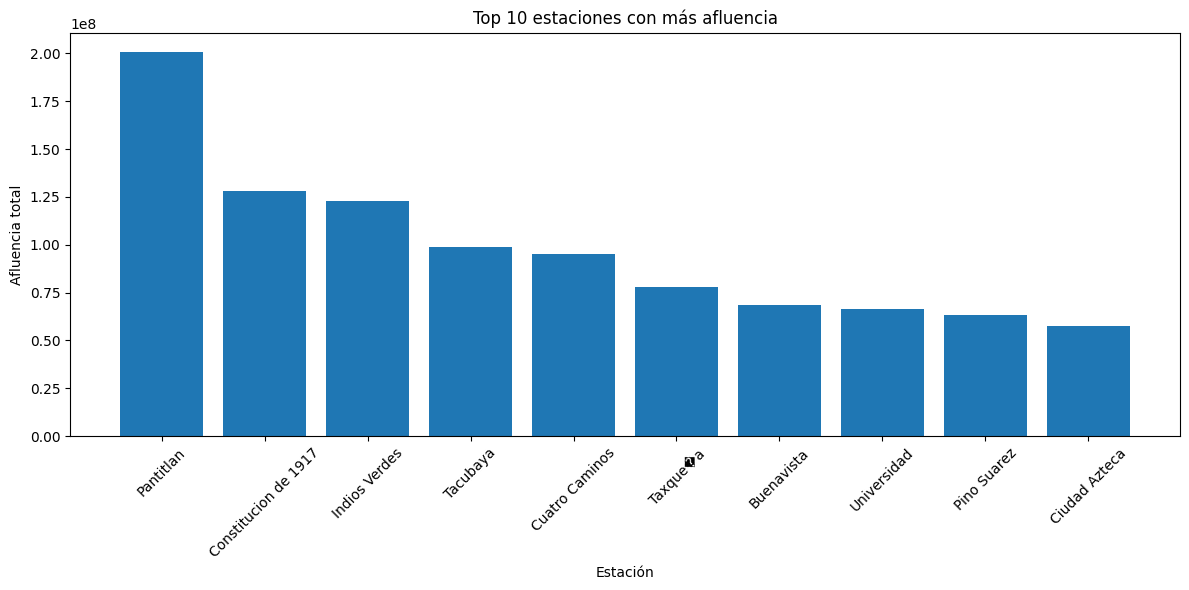

In [0]:
#Visualizacion estaciones mas concurridad
top_estaciones_pd = estaciones_top.limit(10).toPandas()

plt.figure(figsize=(12,6))
plt.bar(top_estaciones_pd['estacion'], top_estaciones_pd['total_afluencia'])
plt.xticks(rotation=45)
plt.title("Top 10 estaciones con más afluencia")
plt.ylabel("Afluencia total")
plt.xlabel("Estación")
plt.tight_layout()
plt.show()


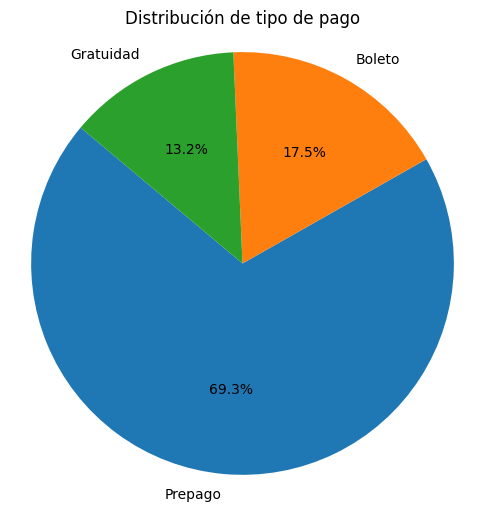

In [0]:
#Visuañlizacion segun el tipo de pago
tipos_pago_pd = tipos_pago.toPandas()

plt.figure(figsize=(6,6))
plt.pie(tipos_pago_pd['total_afluencia'], labels=tipos_pago_pd['tipo_pago'], autopct='%1.1f%%', startangle=140)
plt.title("Distribución de tipo de pago")
plt.axis('equal')
plt.show()


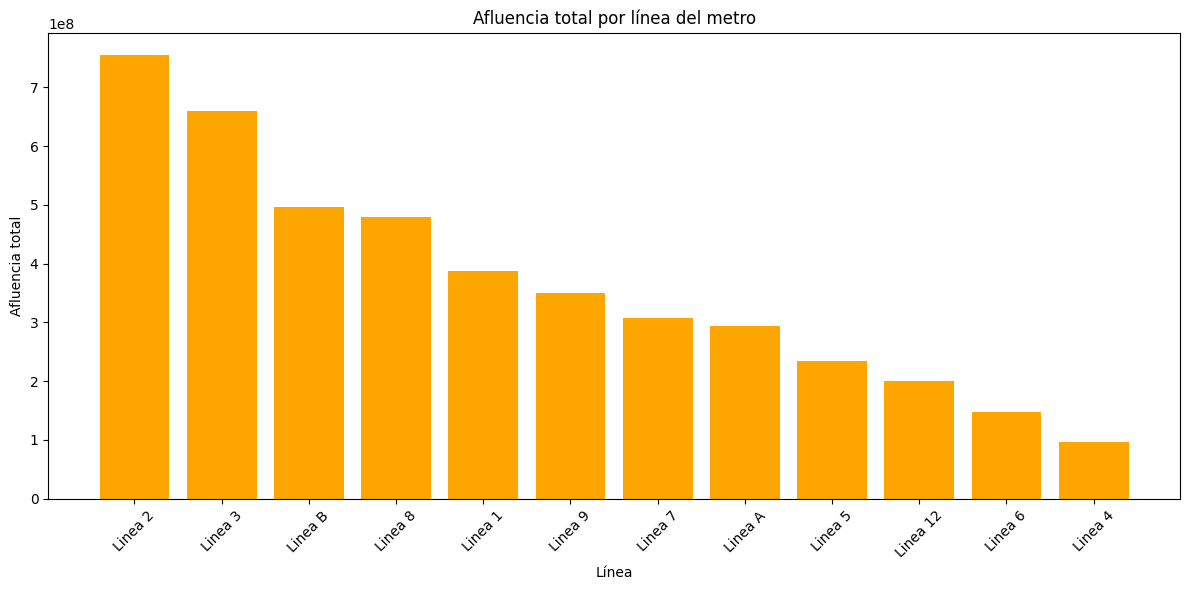

In [0]:
#Visualizacion concurrencia segun la linea
lineas_pd = lineas_mas_usadas.toPandas()

plt.figure(figsize=(12,6))
plt.bar(lineas_pd['linea'], lineas_pd['total_afluencia'], color='orange')
plt.title("Afluencia total por línea del metro")
plt.ylabel("Afluencia total")
plt.xlabel("Línea")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


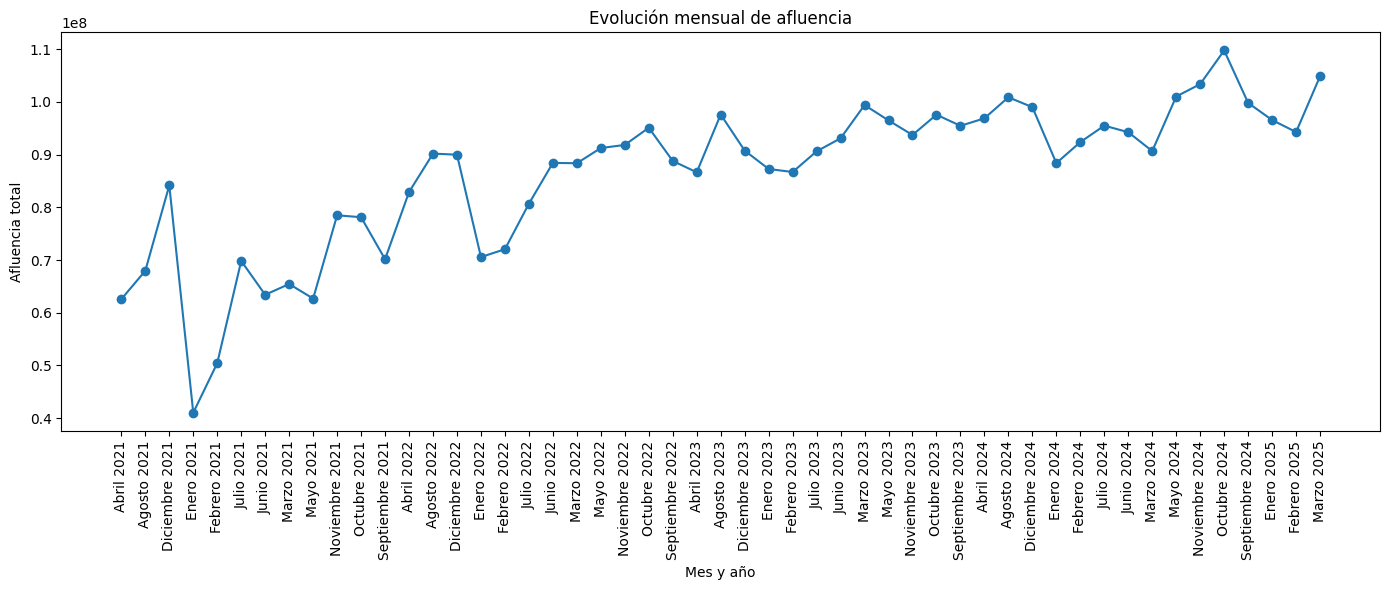

In [0]:
#Visualizacion concurrencia mensual
viajes_mes_pd = viajes_por_mes.toPandas()
meses_ordenados = viajes_mes_pd.sort_values(by=['anio', 'mes'])

plt.figure(figsize=(14,6))
plt.plot(meses_ordenados['mes'] + " " + meses_ordenados['anio'].astype(str), 
         meses_ordenados['total_afluencia'], marker='o')

plt.xticks(rotation=90)
plt.title("Evolución mensual de afluencia")
plt.ylabel("Afluencia total")
plt.xlabel("Mes y año")
plt.tight_layout()
plt.show()
